## Managing parameterizations with python
This jupyter notebook continues on from "parameterization.ipynb" so ensure you have read that and looked at carrying out parameterizations of molecules (in pdb format) using antechamber and tleap. The things contained here are: generating pdb files from smiles and then paramterizing them for python. Carrying out openmm simulations from these parameterizations will be in sepearate notebook.

# 1. Load AmberTools23 environment.
This is the environment set up using instructions found in the "parameterization.ipynb" notebook.

In [ ]:
conda activate AmberTools23 # This activates the environment and will allow use of everything installed in that environment

# 2. Set up directories
There are better ways to do this - but do this manually to ensure everything is correct.
Make sure you are your home directory and then follow the commands below.

Linux commands used in the this section:
    cd = this will change you to your home directory
    cd path/to/directory = will change to the directory path given 
    cd .. = Will take you back one directory
    mkdir = will make a new directory

In [ ]:
cd # Take you to your home directory

In [ ]:
mkdir 01_polymer_md # Make a new directory for molecular dynamics of polymers - this will be the base directory for the python scripts

In [ ]:
cd 01_polymer_md # Change into the new base directory

In [ ]:
mkdir csvs # Make a directory to store csvfiles 

In [ ]:
mkdir pdb_files # Make a directory to store pdb_files - we will make some subdirectories here simply for organization

In [ ]:
cd pdb_files

In [ ]:
mkdir molecules # This directory is where pdb_files of molecules will go

In [ ]:
cd .. # This command takes you back 1 directory, here it will take you to ~/01_polymer_md/pdb_files

In [ ]:
cd .. # As above, but this will take you to ~/01_polymer_md

The directory tree will look something like this:
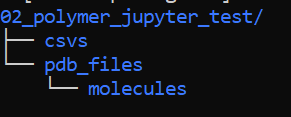

(02_polymer_jupyter_test - is instead of 01_polymer_md, I created this driectory to test this notebook)

# 2. Get a csv file ready
## This csv file will contain the names and SMILES strings of molecules, and will passed to a python script to make pdb files for each molecule

The csv file can be made in excel and should look like this:
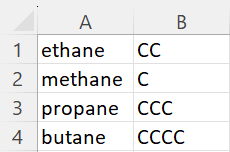

Note: no column names are required, just 2 columns with the [name] and [SMILES] of the molecule.

### Obtaining a SMILES string
SMILES strings can be obtained from this website: https://molview.org/

In https://molview.org/ , you can build your own molecule or search for it and see if already exists.
The main screen looks like this:
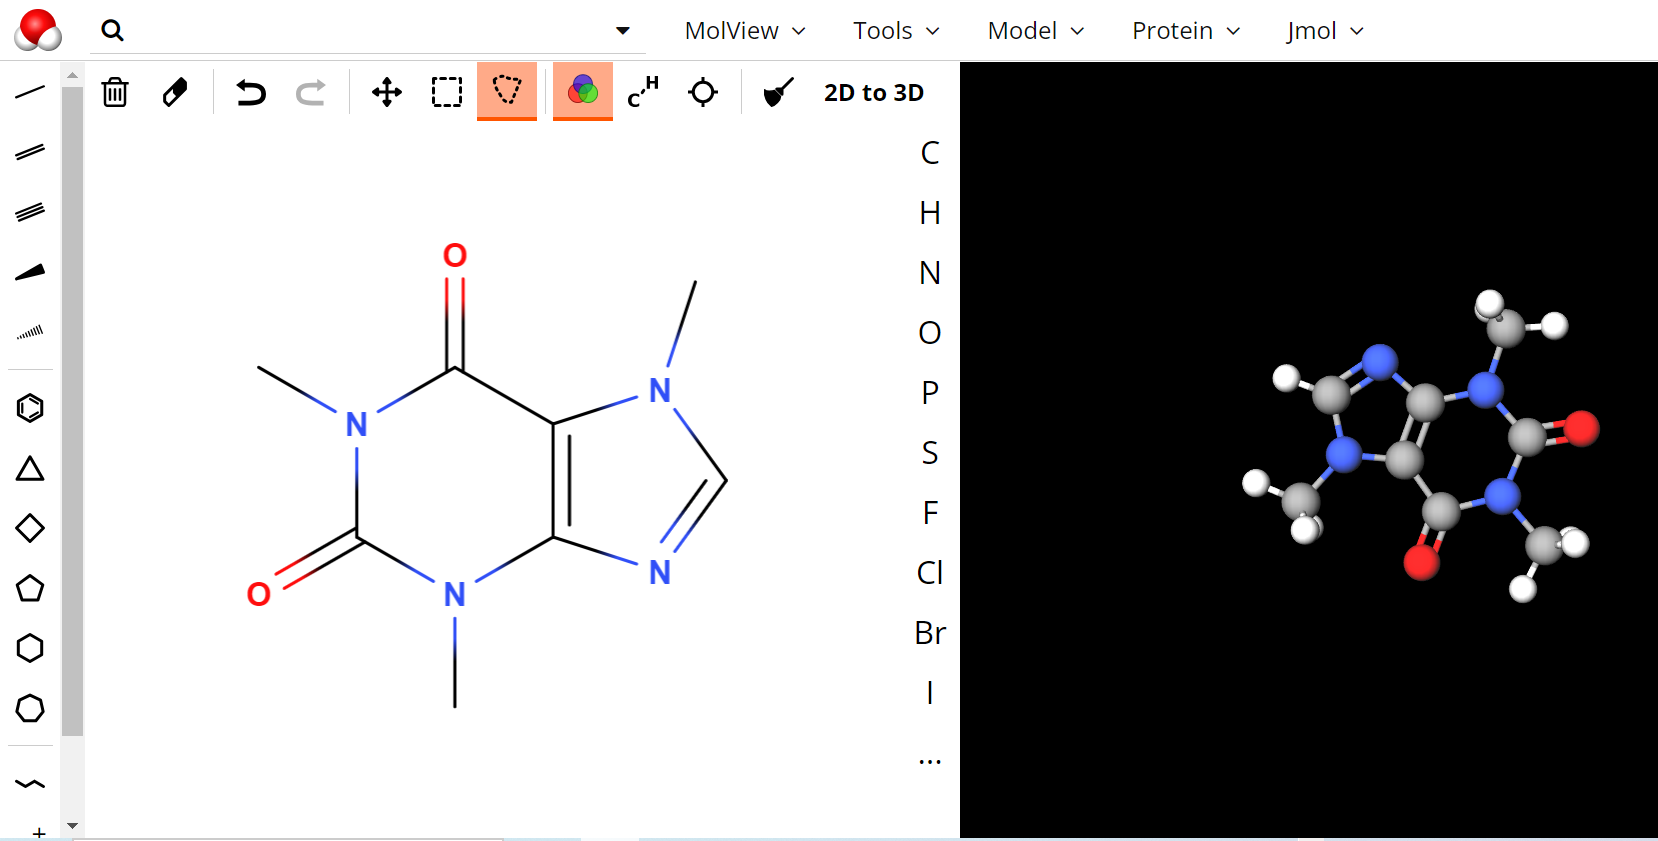

In the top toolbar there is a section called "Tools", in the drop down menu there is an "Information card" option where details about the molecule are found:
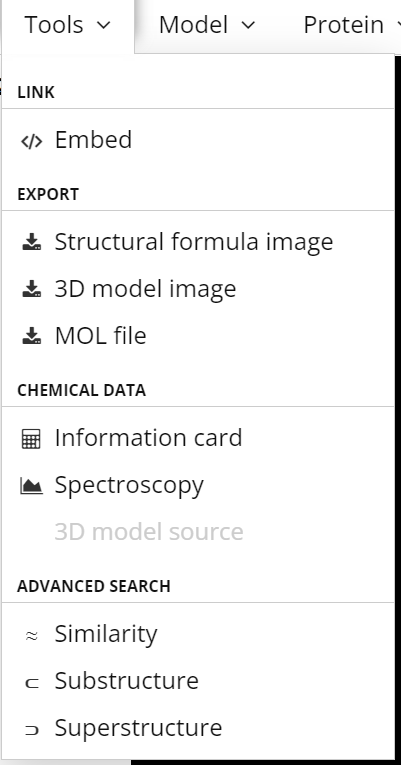

Click on "information card" and then a screen with some information will appear:
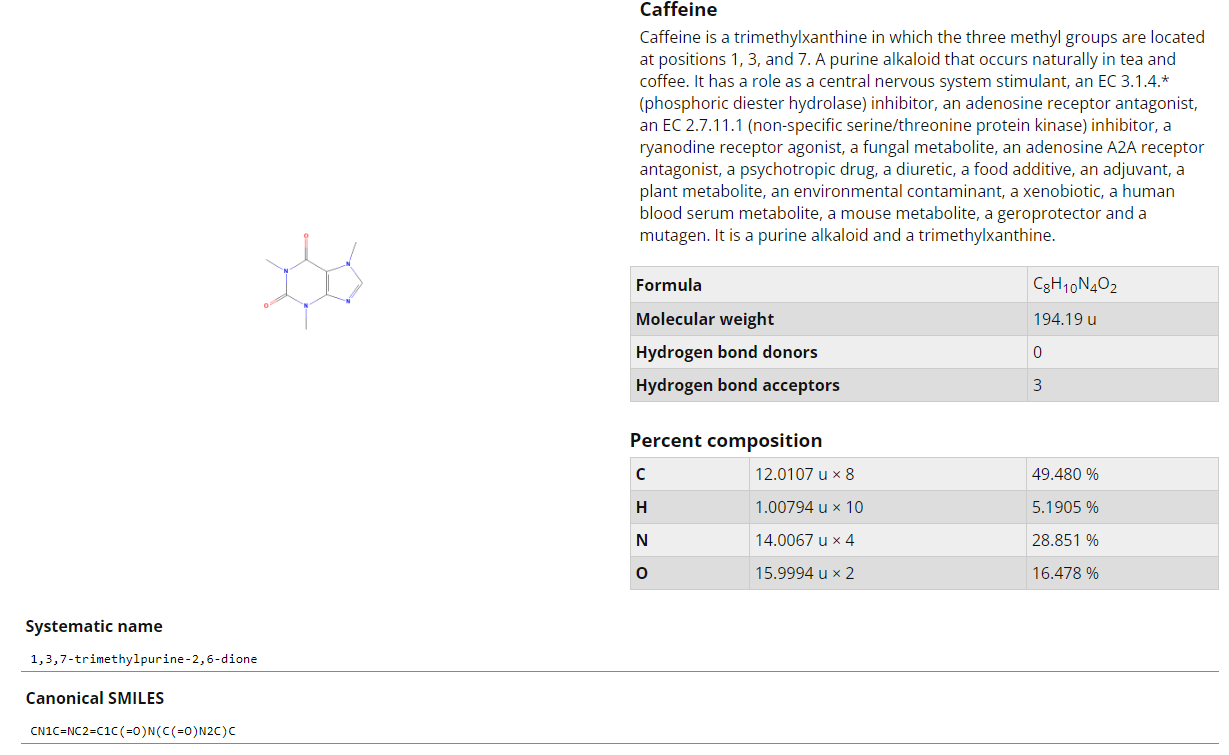

From here, you can copy the SMILES string and paste it into your csv file alongside the name (this can be the systematic name or any other name where you know what molecule it is).

### Another useful SMILES tool
This isn't required for obtaining SMILES but is a useful place to view mutiple SMILES strings at once and check any SMILES you have built yourself are valid: https://www.cheminfo.org/Chemistry/Cheminformatics/Smiles/index.html

### 3. Get python scripts
Now we can copy our csv_file to the directory we made earlier called "csvs"

And we need to transfer python scripts into the "01_polymer_md" directory.

#### python file 1. smiles_to_pdb.py
Running this python file with a molecule name and smilestring as an argument will generate a pdb file for the given molecule

#### python file 2. csv_to_pdb.py 
This python script uses functions imported from the above python script and runs the same functions iteratively over each molecule and SMILES in the csv file.

Running this python file with a csv as an argument (see code lines below) will generate pdb files for each molecule in the csv file.

#### What your file tree should look like
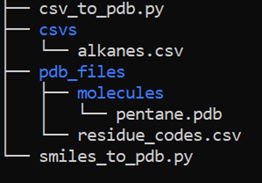
This contains both python scripts, folder for csv_files, and a pdb_file/molecules directory where we will be able to find our pdb files once we have made them.

NOTE: to see your file tree, enter "tree" into the ubuntu shell  as below:
```shell
tree
```
It may need installing, but if it is not present, instructions should appear.

### 4. Run python scripts to generate pdb files
#### Using smiles_to_pdb.py

To use this python script we need to provide a name and a SMILES string. As a simple example I will use pentane (SMILES = CCCCC).

In [ ]:
python3 smiles_to_pdb.py pentane CCCCC

Now your file tree should look like this:
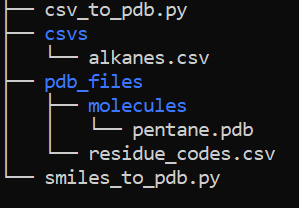

You can see we have now generated a file called "pentane.pdb" in the pdb_files/molecules directory.

##### Error
If you run this script as so:
```shell
python3 smiles_to_pdb.py 
```
And provide no arguments, you will see this error:
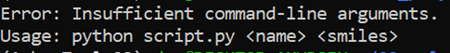
Rerun the script an ensure you add arguments for your molecule name and SMILES string.

#### Using csv_to_pdbs.py

Now we have done a single molecule, lets try and use the csv we prepared earlier. I recommend adding more than one molecule to this csv. An example file called "alkanes.csv" can be found in this folder in the github.

In [ ]:
python3 csv_to_pdbs.py csvs/alkanes.csv

This will generate more pdb files for each molecules specified in the csv file. The file tree should now look like this: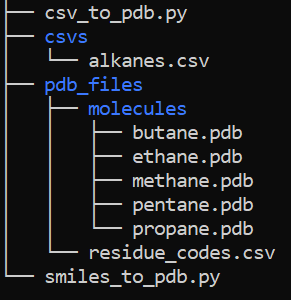
We now have the other alkanes specified in the csv file.

##### Error
If you run this script as so:
```shell
python3 csv_to_pdb.py
```
And provide no arguments, you will see this error:
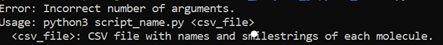
Rerun the script an ensure you add arguments for your csv file. The argument needs to be "csvs/csv_file.name" as the csv_file is found in the csvs directory.

### 5. Paramaterizing these pdb files

Now we have generated out pdb files, we can paramterize them as seen in the "parameterization.ipynb" notebook but by using python scripts to carry out the process. We need one python script "python_parameterizer.py" which can be found in the same place as this notebook. We need to transfer this python scriptsinto the "01_polymer_md" directory.

#### python file python_parameterizer.py

Running this python file with a path to a pdb_file in the pdb_files/molecules directory will create a directory for that molecule containing the .frcmod, .intleap, .lib, .mol2 and .pdb files for that molecule. It will then remove the original pdb file as that file now exists in the new directory.

Note: No editing is required for this code to work with the pdb file.

Note: A new directory is made simply for better organisation, 5 files exist for each molecule and navigation is much more user friendly if all these files for each molecule are found in their own directory.

#### Using python_parameterizer.py

To use this python script we need to provide a filepath to a pdb_file - I will use methane for this example.

In [ ]:
# Note: Instead of "02_polymer_jupyter_test", your directory will be called "01_polymer_md"
# Note: This script is run from the 01_polymer_md directory
# Note: Type "pwd" into the command line to obtain the first part of the filepath
python3 python_parameterizer.py /home/dan/02_polymer_jupyter_test/pdb_files/molecules/methane.pdb

Now our file tree should look like this:
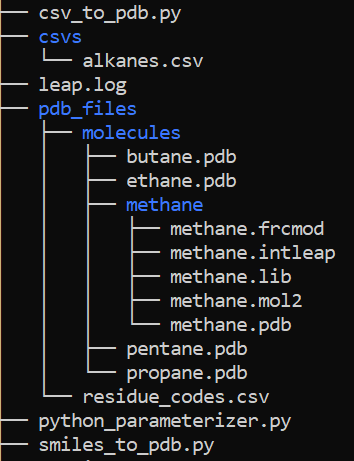

Instead of methane.pdb, we now have new directory called "methane" containing some files we can now use to set up simulations.

#### Now try the python script again and change the path to the pdb file
An example using ethane is shown below:

In [ ]:
python3 python_parameterizer.py /home/dan/02_polymer_jupyter_test/pdb_files/molecules/ethane.pdb

And we will see another directory appear for ethane:
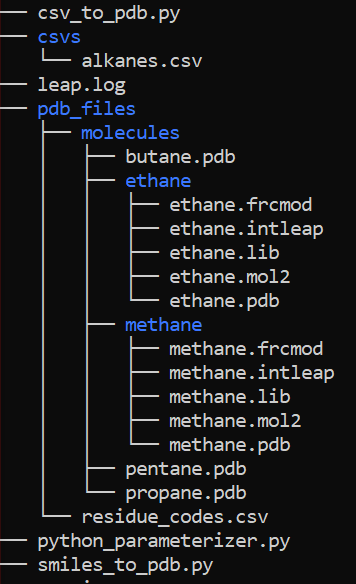

Now you can run the script on all of your pdb_files to parameterize them.

It is also important to note that these molecules in the example are only examples and you should try and use your own by generating the pdb file from either the smiles or using the csv method!

#### Editing the python script to construct intleap files for tleap with different parameters
A list of available parameters can be found in ~/miniconda3/envs/AmberTools23/dat/leap/param


### 6. Solvating these parameterized molecules

Now we have parameterized our molecules, we can call the the parameters as seen in the previous tutorial "parameterization.ipynb" into a tleap script to create a solvated system. Enter tleap by typing "tleap" and then run these commands line-by-line.

```
# Load the necessary force field parameters
source leaprc.protein.ff14SB
source leaprc.gaff
source leaprc.water.fb3
methane  = loadMol2 pdb_files/molecules/methane/methane.mol2
list
saveoff methane pdb_files/molecules/methane/methane.lib

# Solvate the system
solvateBox methane TIP3PBOX 10.0

saveamberparm methane pdb_files/molecules/methane/sing_solv_methane.prmtop pdb_files/molecules/methane/sing_solv_methane.rst7
savepdb methane pdb_files/molecules/methane/sing_solv_methane_prm.pdb
quit
```
The "loadMol2" command calls the parameters from the previous step (the mol2 file generated) - but the entire path to directory is specified so we can access that file. It is also neccessary to add the full path to the to the methane direcertory for the other files we generate - namely the .prmtop, .rst7 and prm.pdb files so everything stays organised.

You will also notice that the parameters generated are called "sing_solv_methane....", this is becuase we are solvating a single methane molecule in water and we don't want to overwrite any otherfiles we will make using methane. The file tree with these new files will look like this (see methane directory):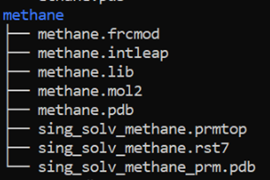


#### Checking the solvated system using vmd or ovito

Open vmd or ovito - you may need to download them: <br />
    VMD: https://www.ks.uiuc.edu/Development/Download/download.cgi?PackageName=VMD <br />
    ovito: https://www.ovito.org/#download

In the directory "pdb_files/molecules/methane" you can find the sing_solv_methane_prm.pdb file. <br /> Open vmd or ovito and load the pdb file. You will something like this in ovito (ignore the box lines - this is a visualisation issue):
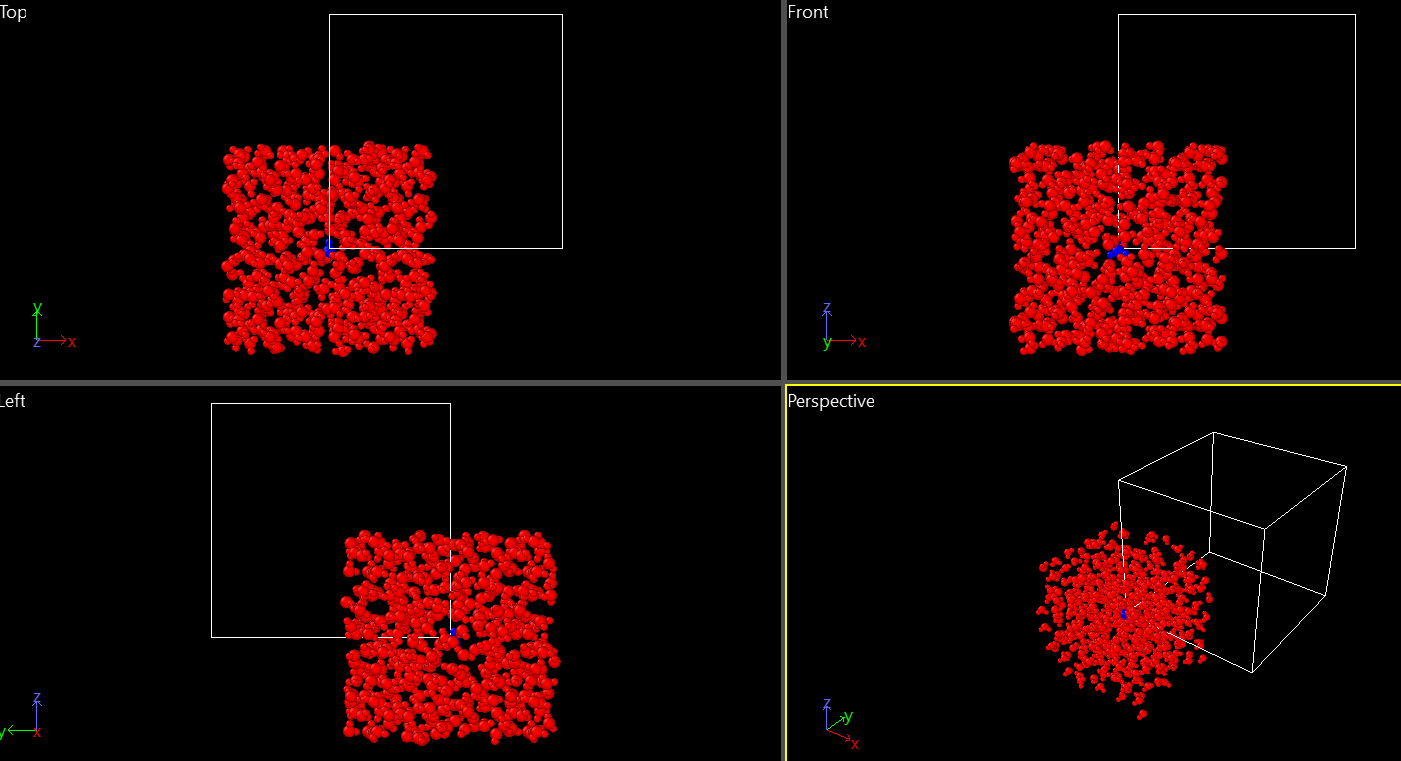

VMD will show only one view of the system but it will look the same! <br />
Your system will not be coloured the same way when intially opening the file and a quick guide to colouring these systems ~~can be found in the notebook~~ will be created at some point.<br />
Personally I prefer VMD but both options are good.<br />

If you see a cubic system it means the molecule has been solvated and you can run a simulation using the .prmtop and .rst7 files. <br />

What are these files? <br />
rst7 = coordinates of atoms in the file - but no information on atom connections <br />
prmtop = atom connection information in the file - but no information on spacial location of these atoms

#### python file single_molecule_solvater_tleap.py

Running this python file with the name of parameterized molecule will solvate it in a box of water and the box size will be relative to the size of the molecule.


#### Using single_molecule_solvater_tleap.py

To use this python script we only need to provide the the name of the molecule we want to solvate (not the whole path as we have done previously). I will ethane as an example as we have already generated the files for methane by running the scripts manually through tleap.

In [ ]:
python3 sing_molecule_solvater_tleap.py ethane

At this point you should view your file tree and it should now have some extra files in the ethane directory: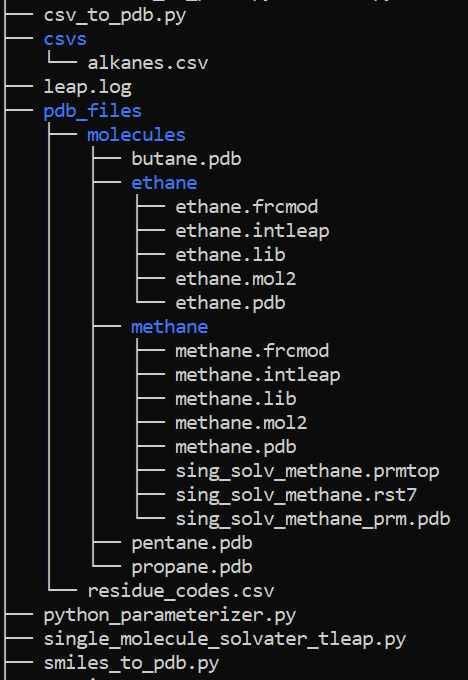

##### Error

If you run the above python script, but havent parameterized the molecule you will be shown this error:
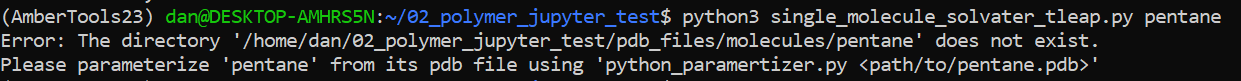

To fix this error, you need to parameterize a molecule. <br />

If you already generated the .pdb file for the molecule, you need to run the "python_parameterizer.py" and provide the path to the pdb file as described in step 5.<br />

If you haven't got the pdb file yet, generate it using either "smiles_to_pdb.py" or "csv_to_pdb.py" as in step 4. <br />

Then rerun the script "sing_molecule_solvate_tleap.py" with your molecule name.

### 7. Run simulation using python script

Instead of opening the python interpreter it is easier to load all of the python commands into a python file and execute that by specifying the files we have just generated for the solvated systems. <br />

The python script can be found in the same location as this notebook and is called "simple_md_run.py", when running this script a .prmtop and .rst7 file are required for topological and spatial information regarding the system.

In [ ]:
python3 simple_md_run.py sing_solv_methane.prmtop sing_solv_methane.rst7